In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [0]:
def kalman_prediction(
    a: np.matrix,
    R: np.matrix,
    G_next: np.matrix,
    W_next: np.matrix,
) -> np.matrix:
    # 一期先予測分布
    a_next = G_next @ a  # 平均
    R_next = G_next @ R @ G_next.T + W_next  # 分散 

    return a_next, R_next

In [0]:
def kalman_filtering(
    m_prev: np.matrix,
    C_prev: np.matrix,
    G: np.matrix,
    W: np.matrix,
    F: np.matrix,
    V: np.matrix,
    y: np.matrix,
    n_dim: int,
) -> np.matrix:
    # 一期先予測分布
    a = G @ m_prev  # 平均
    R = G @ C_prev @ G.T + W  # 分散

    # 一期先予測尤度
    f = F @ a
    Q = F @ R @ F.T + V

    # カルマン利得
    K = R @ F.T @ np.linalg.inv(Q)
    
    # 次の時点でのフィルタリング分布平均、共分散
    m = a + K @ (y - f)
    C = [np.matrix(np.identity(n_dim)) - K @ F] @ R

    return m, C

## sin波

In [0]:
x1 = np.linspace(0, 40, 300)
y_observed = np.sin(x1)

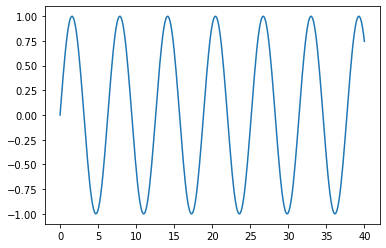

In [29]:
plt.plot(x1, y_observed)

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([0.1])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([1.5])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([1])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

In [0]:
for y in y_observed:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

(-2, 2)

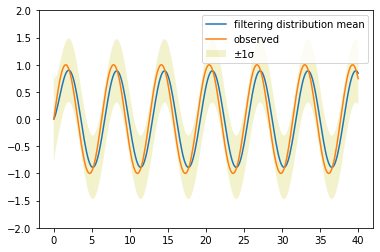

In [33]:
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x1,
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.legend()
plt.ylim([-2, 2])

In [0]:
a_hist = copy.deepcopy(m_hist)
R_hist = copy.deepcopy(C_hist)

In [0]:
x2 = np.linspace(40, 60, 150)

In [0]:
for i in x2:
    a_next, R_next = kalman_prediction(
        a_hist[-1],
        R_hist[-1],
        G, W,
    )
    a_hist.append(a_next)
    R_hist.append(R_next)

In [0]:
x = np.hstack([x1, x2])

(-2, 2)

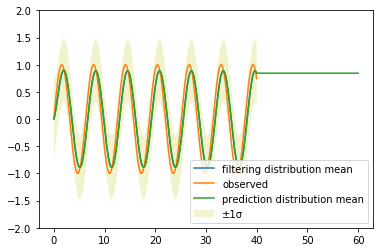

In [39]:
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x1,
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.plot(x, [float(a) for a in a_hist][1:], label='prediction distribution mean')
plt.legend()
plt.ylim([-2, 2])

(-3, 3)

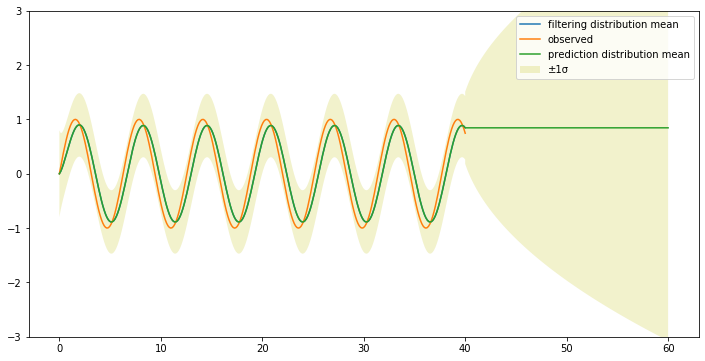

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x,
    [float(a) - np.sqrt(float(R)) for a, R in zip(a_hist, R_hist)][1:],
    [float(a) + np.sqrt(float(R)) for a, R in zip(a_hist, R_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.plot(x, [float(a) for a in a_hist][1:], label='prediction distribution mean')
plt.legend()
plt.ylim([-3, 3])

## ナイル川流量

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/nile/nile.csv')

In [45]:
df.head()

,year,volume
0,1871,1120
1,1872,1160
2,1873,963
3,1874,1210
4,1875,1160


In [46]:
df.tail()

,year,volume
95,1966,746
96,1967,919
97,1968,718
98,1969,714
99,1970,740


In [0]:
x1 = list(df['year'])
y_observed = df['volume']

In [0]:
x2 = list(range(1971, 2030))

In [0]:
x = x1 + x2

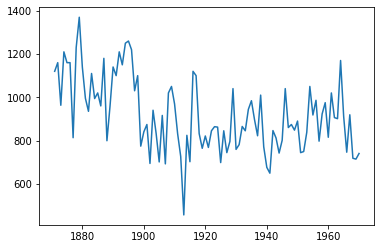

In [53]:
plt.plot(df['year'], df['volume'])

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([10000])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([150000])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([100000])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

In [0]:
for y in df['volume']:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

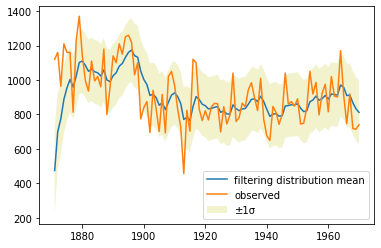

In [57]:
plt.plot(df['year'], [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    df['year'],
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(df['year'], df['volume'], label='observed')
plt.legend()

In [0]:
a_hist = copy.deepcopy(m_hist)
R_hist = copy.deepcopy(C_hist)

In [0]:
for i in x2:
    a_next, R_next = kalman_prediction(
        a_hist[-1],
        R_hist[-1],
        G, W,
    )
    a_hist.append(a_next)
    R_hist.append(R_next)

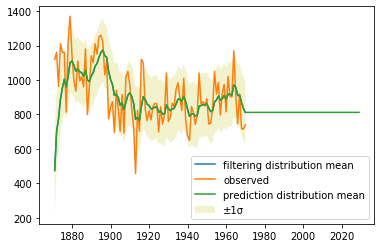

In [66]:
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x1,
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.plot(x, [float(a) for a in a_hist][1:], label='prediction distribution mean')
plt.legend()

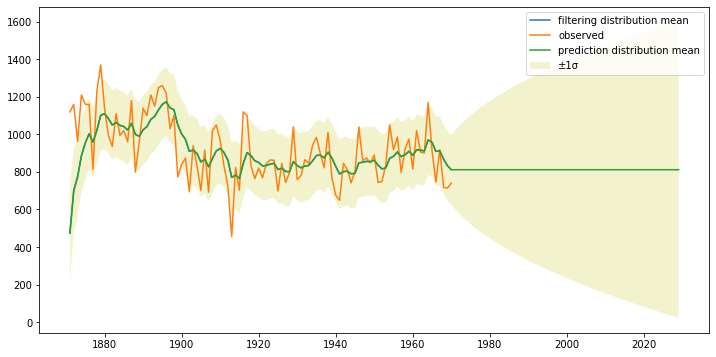

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x,
    [float(a) - np.sqrt(float(R)) for a, R in zip(a_hist, R_hist)][1:],
    [float(a) + np.sqrt(float(R)) for a, R in zip(a_hist, R_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.plot(x, [float(a) for a in a_hist][1:], label='prediction distribution mean')
plt.legend()

### 観測雑音小

In [0]:
# 初期化
G = np.matrix([1])  # 状態遷移行列
W = np.matrix([10000])  # 状態雑音共分散行列
F = np.matrix([1])  # 観測行列
V = np.matrix([10000])  # 観測雑音共分散行列
m0 = np.matrix([0])  # フィルタリング分布平均ベクトル初期値
C0 = np.matrix([100000])  # フィルタリング分布の共分散行列初期値

In [0]:
m_hist = [m0]  # フィルタリング分布平均ベクトル
C_hist = [C0]  # フィルタリング分布の共分散行列
a_hist = [m0]  # 一期先予測分布平均ベクトル
R_hist = [C0]  # 一期先予測分布共分散行列

In [0]:
for y in df['volume']:
    m, C = kalman_filtering(
        m_hist[-1],
        C_hist[-1],
        G, W, F, V,
        np.matrix([y]),
        n_dim=1
    )
    # print(m)
    # print(C)
    m_hist.append(m)
    C_hist.append(C)

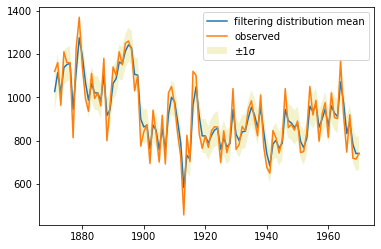

In [72]:
plt.plot(df['year'], [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    df['year'],
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(df['year'], df['volume'], label='observed')
plt.legend()

In [0]:
a_hist = copy.deepcopy(m_hist)
R_hist = copy.deepcopy(C_hist)

In [0]:
for i in x2:
    a_next, R_next = kalman_prediction(
        a_hist[-1],
        R_hist[-1],
        G, W,
    )
    a_hist.append(a_next)
    R_hist.append(R_next)

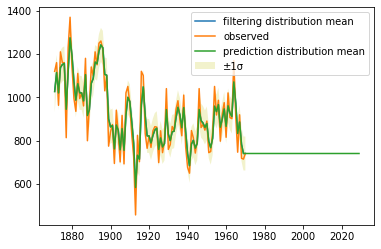

In [75]:
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x1,
    [float(m) - np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    [float(m) + np.sqrt(float(C)) for m, C in zip(m_hist, C_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.plot(x, [float(a) for a in a_hist][1:], label='prediction distribution mean')
plt.legend()

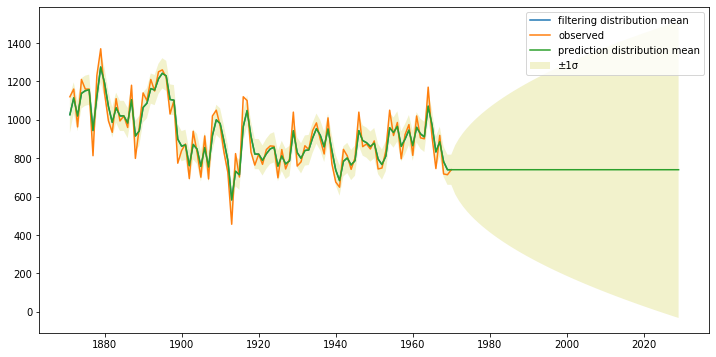

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(x1, [float(m) for m in m_hist][1:], label='filtering distribution mean')
plt.fill_between(
    x,
    [float(a) - np.sqrt(float(R)) for a, R in zip(a_hist, R_hist)][1:],
    [float(a) + np.sqrt(float(R)) for a, R in zip(a_hist, R_hist)][1:],
    alpha=0.2,
    facecolor='y',
    label='±1σ'
)
plt.plot(x1, y_observed, label='observed')
plt.plot(x, [float(a) for a in a_hist][1:], label='prediction distribution mean')
plt.legend()